In [3]:
# Advertising Dataset
# Classification: High Sales / Low Sales

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset (same folder as notebook)
data = pd.read_csv("Advertising.csv")

# Create binary target variable
data['Sales_Class'] = data['Sales'].apply(lambda x: 1 if x >= 15 else 0)

# Features and target
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales_Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb.predict(X_test)))

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("KNN Accuracy:", accuracy_score(y_test, knn.predict(X_test)))

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt.predict(X_test)))

Naive Bayes Accuracy: 0.975
KNN Accuracy: 1.0
Decision Tree Accuracy: 1.0


In [14]:
# Dataset 2: Advertising Dataset
# Regression: Simple Linear & Multiple Linear Regression
# Loss Functions: MSE, MAE, Huber Loss, R² Score

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset (same folder as notebook)
data = pd.read_csv("Advertising.csv")

# Target
y = data['Sales']

# --------- Huber Loss Function (Manual) ----------
def huber_loss_manual(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    abs_error = np.abs(error)
    quadratic = np.minimum(abs_error, delta)
    linear = abs_error - quadratic
    return np.mean(0.5 * quadratic**2 + delta * linear)

# 1️⃣ SIMPLE LINEAR REGRESSION

X_simple = data[['TV']]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y, test_size=0.2, random_state=1
)

simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)

y_pred_s = simple_model.predict(X_test_s)

print("SIMPLE LINEAR REGRESSION")
print("MSE:", mean_squared_error(y_test_s, y_pred_s))
print("MAE:", mean_absolute_error(y_test_s, y_pred_s))
print("Huber Loss:", huber_loss_manual(y_test_s, y_pred_s))
print("R² Score:", r2_score(y_test_s, y_pred_s))
print("-" * 40)


# 2️⃣ MULTIPLE LINEAR REGRESSION
X_multi = data[['TV', 'Radio', 'Newspaper']]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y, test_size=0.2, random_state=1
)

multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

y_pred_m = multi_model.predict(X_test_m)

print("MULTIPLE LINEAR REGRESSION")
print("MSE:", mean_squared_error(y_test_m, y_pred_m))
print("MAE:", mean_absolute_error(y_test_m, y_pred_m))
print("Huber Loss:", huber_loss_manual(y_test_m, y_pred_m))
print("R² Score:", r2_score(y_test_m, y_pred_m))

SIMPLE LINEAR REGRESSION
MSE: 5.304256414232314
MAE: 1.9042820838267638
Huber Loss: 1.4484387170274302
R² Score: 0.7241962282650849
----------------------------------------
MULTIPLE LINEAR REGRESSION
MSE: 2.4093336128923672
MAE: 1.2754390912939682
Huber Loss: 0.836414423371599
R² Score: 0.8747226291661847


SIMPLE LINEAR REGRESSION
MSE: 5.304256414232314
MAE: 1.9042820838267638
Huber Loss: 1.4484387170274302
R² Score: 0.7241962282650849
----------------------------------------


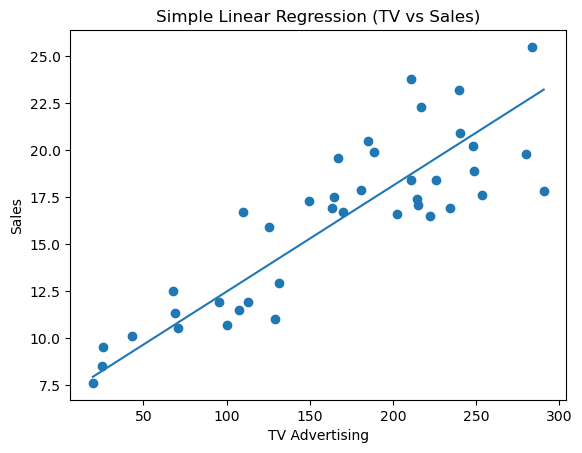

MULTIPLE LINEAR REGRESSION
MSE: 2.4093336128923672
MAE: 1.2754390912939682
Huber Loss: 0.836414423371599
R² Score: 0.8747226291661847


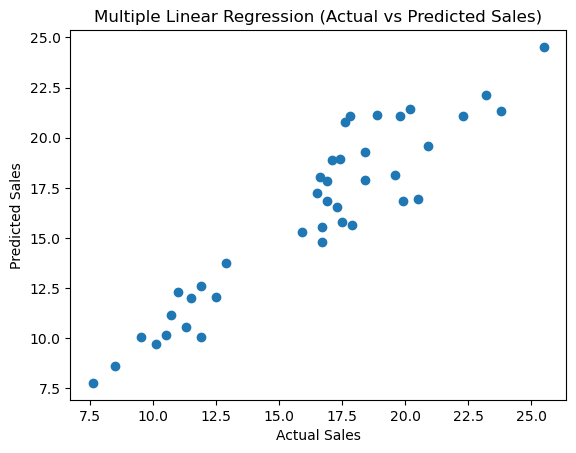

In [13]:
# Advertising Dataset
# Regression: Simple Linear & Multiple Linear Regression
# Loss Functions + Graphs (Single Code)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset (same folder as notebook)
data = pd.read_csv("Advertising.csv")

y = data['Sales']

# --------- Manual Huber Loss ----------
def huber_loss_manual(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    abs_error = np.abs(error)
    quadratic = np.minimum(abs_error, delta)
    linear = abs_error - quadratic
    return np.mean(0.5 * quadratic**2 + delta * linear)

# ====================================
# 1️⃣ SIMPLE LINEAR REGRESSION (TV)
# ====================================
X_simple = data[['TV']]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y, test_size=0.2, random_state=1
)

simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)

y_pred_s = simple_model.predict(X_test_s)

print("SIMPLE LINEAR REGRESSION")
print("MSE:", mean_squared_error(y_test_s, y_pred_s))
print("MAE:", mean_absolute_error(y_test_s, y_pred_s))
print("Huber Loss:", huber_loss_manual(y_test_s, y_pred_s))
print("R² Score:", r2_score(y_test_s, y_pred_s))
print("-" * 40)

# Plot Simple Linear Regression
sorted_idx = X_test_s['TV'].argsort()
X_sorted = X_test_s.iloc[sorted_idx]
y_sorted = y_pred_s[sorted_idx]

plt.figure()
plt.scatter(X_test_s, y_test_s)
plt.plot(X_sorted, y_sorted)
plt.xlabel("TV Advertising")
plt.ylabel("Sales")
plt.title("Simple Linear Regression (TV vs Sales)")
plt.show()

# ====================================
# 2️⃣ MULTIPLE LINEAR REGRESSION
# ====================================
X_multi = data[['TV', 'Radio', 'Newspaper']]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y, test_size=0.2, random_state=1
)

multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

y_pred_m = multi_model.predict(X_test_m)

print("MULTIPLE LINEAR REGRESSION")
print("MSE:", mean_squared_error(y_test_m, y_pred_m))
print("MAE:", mean_absolute_error(y_test_m, y_pred_m))
print("Huber Loss:", huber_loss_manual(y_test_m, y_pred_m))
print("R² Score:", r2_score(y_test_m, y_pred_m))

# Plot Multiple Linear Regression
plt.figure()
plt.scatter(y_test_m, y_pred_m)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Multiple Linear Regression (Actual vs Predicted Sales)")
plt.show()

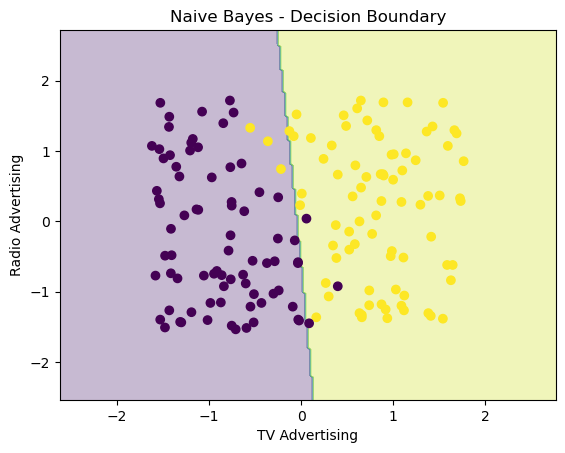

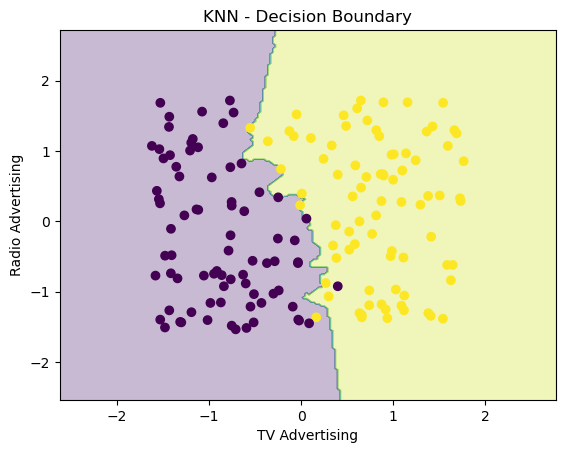

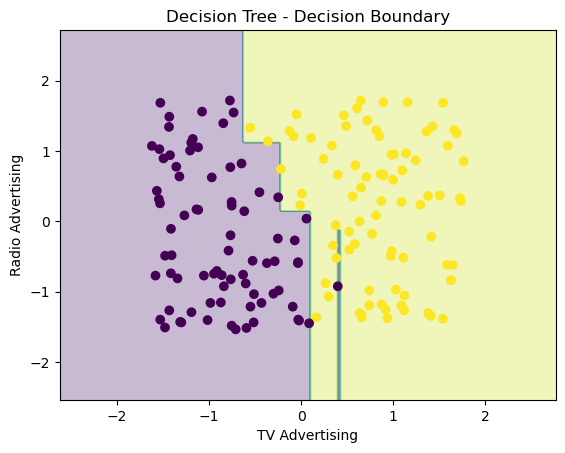

In [7]:
# Classification Graph Comparison - Advertising Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Load dataset (same folder as notebook)
data = pd.read_csv("Advertising.csv")

# Binary target variable
data['Sales_Class'] = data['Sales'].apply(lambda x: 1 if x >= 15 else 0)

# Use two features for visualization
X = data[['TV', 'Radio']]
y = data['Sales_Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models to compare
models = {
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=1)
}

# Plot decision boundaries
for name, model in models.items():
    model.fit(X_train, y_train)

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    plt.xlabel("TV Advertising")
    plt.ylabel("Radio Advertising")
    plt.title(name + " - Decision Boundary")
    plt.show()